In [2]:
# Not all are necessary
import sys
import os
#import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
import pandas as pd

from data_cleaning.data_cleaner import DataCleaner

In [3]:
project_root = os.getcwd()
sys.path.append(os.path.abspath(project_root))

In [4]:
dc: DataCleaner = DataCleaner(project_root + '/raw-data/GlobalLandTemperaturesByCountry.csv')
dc.handle_missing(column='AverageTemperature', strategy='drop')
print(dc.count_missing_values())
dc.preview(10)

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
10,1744-09-01,11.702,1.517,Åland
11,1744-10-01,5.477,1.862,Åland
12,1744-11-01,3.407,1.425,Åland
13,1744-12-01,-2.181,1.641,Åland
14,1745-01-01,-3.850,1.841,Åland


In [5]:
# Drop unneeded columns
columns_to_drop = ['AverageTemperatureUncertainty']
dc.drop(columns_to_drop)
dc.preview(10)

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
5,1744-04-01,1.530,Åland
6,1744-05-01,6.702,Åland
7,1744-06-01,11.609,Åland
8,1744-07-01,15.342,Åland
10,1744-09-01,11.702,Åland
11,1744-10-01,5.477,Åland
12,1744-11-01,3.407,Åland
13,1744-12-01,-2.181,Åland
14,1745-01-01,-3.850,Åland


In [9]:
# Add new column containing monly offset from minimum of each country
# Convert 'dt' column to datetime
dc.df['dt_formatted'] = pd.to_datetime(dc.df['dt'])

# Compute the month offset (monotonically increasing) from the first date
dc.df['month_offset'] = (
    (dc.df['dt_formatted'].dt.year - dc.df.groupby('Country')['dt_formatted'].transform('min').dt.year) * 12
    + (dc.df['dt_formatted'].dt.month - dc.df.groupby('Country')['dt_formatted'].transform('min').dt.month)
    + 1)

# Sort by offset
dc.sort_column('month_offset')
dc.preview(n=100)

,dt,AverageTemperature,Country,dt_formatted,month_offset
0,1743-11-01,5.645,Montenegro,1743-11-01,1
1,1851-01-01,25.364,Costa Rica,1851-01-01,1
2,1903-01-01,25.793,Guam,1903-01-01,1
3,1743-11-01,4.384,Åland,1743-11-01,1
4,1743-11-01,5.928,Bulgaria,1743-11-01,1
...,...,...,...,...,...
95,1825-01-01,21.204,Guatemala,1825-01-01,1
96,1843-01-01,20.097,Oman,1843-01-01,1
97,1825-01-01,25.263,Malaysia,1825-01-01,1
98,1825-01-01,19.539,Vietnam,1825-01-01,1


In [21]:
# Check for unique values (if all unique values for each month_offset no need to aggregate - unless aggregating over country)
def plot_country_trend(country):
    country_df = dc.df[dc.df['Country'] == country]

    if country_df['month_offset'].nunique() == country_df['month_offset'].count():
        plt.plot(country_df['month_offset'], country_df['AverageTemperature'])
        plt.xlabel(f"Months After {country_df['dt'].iloc[0]}")
        plt.ylabel(f"Average Temperature (Degrees Celsius)")
        plt.title(f"Average Temperature in {country}")
        plt.show()


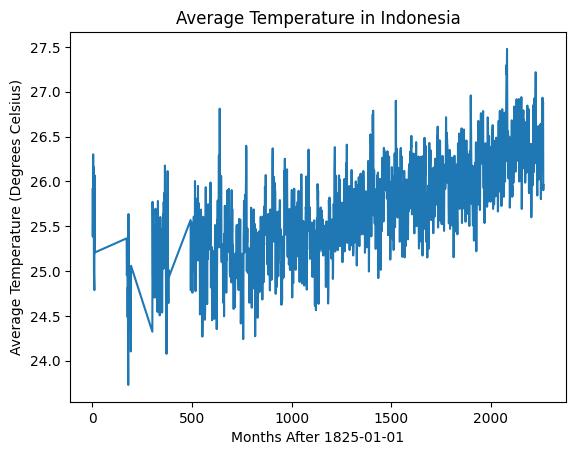

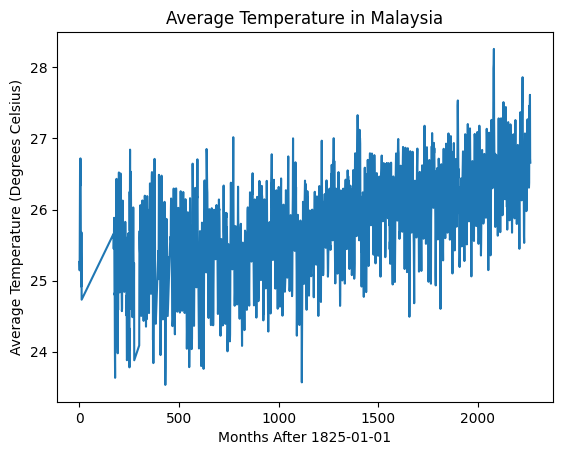

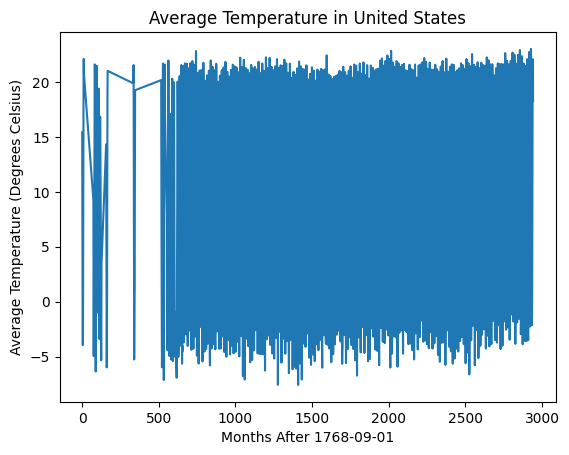

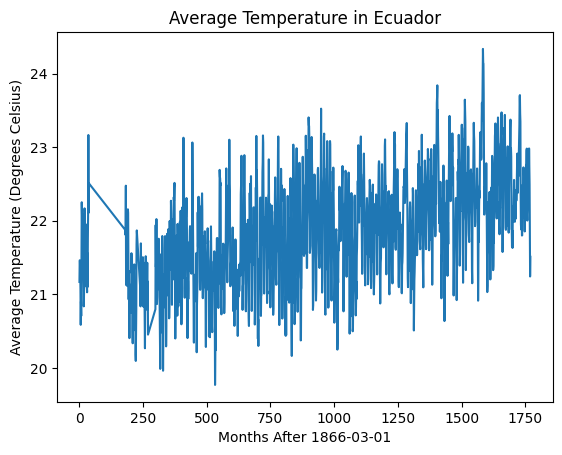

In [25]:
plot_country_trend(country="Indonesia")
plot_country_trend(country="Malaysia")
plot_country_trend(country="United States")
plot_country_trend(country="Ecuador")

#dc.aggregate_data(['Country'], 'mean')
#dc.preview(50)

In [26]:
output_path = project_root + '/clean-data/processed_country_temperature_data.csv'
dc.save_data(output_path)

Data successfully saved to c:\Users\Ethan Crook\Documents\Computer Science 562\ML-Climate-Project/clean-data/processed_country_temperature_data.csv
